<a href="https://colab.research.google.com/github/muhammadhafiz27/Deep-Learning/blob/main/Generative_Adversarial_Networks_(GAN)_untuk_Sintesis_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# **Dataset**

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

# **Generator**

In [3]:
class Generator(nn.Module):
    def __init__(self, noise_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
            nn.Tanh()
        )
    def forward(self, z):
        return self.model(z)

# **Discriminator**

In [4]:
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

# **Inisialisasi**

In [5]:
z_dim = 100
generator = Generator(z_dim, 28*28)
discriminator = Discriminator(28*28)
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)

# **Training Loop**

In [6]:
epochs = 20
for epoch in range(epochs):
    for real, _ in dataloader:
        batch_size = real.size(0)
        real = real.view(batch_size, -1)

        # Label
        real_label = torch.ones(batch_size, 1)
        fake_label = torch.zeros(batch_size, 1)

        # --- Train Discriminator ---
        z = torch.randn(batch_size, z_dim)
        fake = generator(z)

        real_loss = criterion(discriminator(real), real_label)
        fake_loss = criterion(discriminator(fake.detach()), fake_label)
        d_loss = real_loss + fake_loss

        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # --- Train Generator ---
        z = torch.randn(batch_size, z_dim)
        fake = generator(z)
        g_loss = criterion(discriminator(fake), real_label)

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

Epoch [1/20] | D Loss: 1.0757 | G Loss: 0.7426
Epoch [2/20] | D Loss: 1.0280 | G Loss: 0.9702
Epoch [3/20] | D Loss: 0.6985 | G Loss: 1.3852
Epoch [4/20] | D Loss: 1.2589 | G Loss: 0.9193
Epoch [5/20] | D Loss: 0.9858 | G Loss: 0.9137
Epoch [6/20] | D Loss: 1.1212 | G Loss: 0.9842
Epoch [7/20] | D Loss: 1.4053 | G Loss: 0.6946
Epoch [8/20] | D Loss: 1.7908 | G Loss: 0.7917
Epoch [9/20] | D Loss: 0.7343 | G Loss: 1.2537
Epoch [10/20] | D Loss: 0.9926 | G Loss: 0.9233
Epoch [11/20] | D Loss: 1.0799 | G Loss: 1.1376
Epoch [12/20] | D Loss: 0.7493 | G Loss: 1.3234
Epoch [13/20] | D Loss: 1.1248 | G Loss: 1.1674
Epoch [14/20] | D Loss: 1.2072 | G Loss: 0.9284
Epoch [15/20] | D Loss: 1.0350 | G Loss: 0.8851
Epoch [16/20] | D Loss: 0.8605 | G Loss: 1.3331
Epoch [17/20] | D Loss: 1.1227 | G Loss: 1.1419
Epoch [18/20] | D Loss: 0.9295 | G Loss: 1.2737
Epoch [19/20] | D Loss: 0.8309 | G Loss: 1.6313
Epoch [20/20] | D Loss: 0.7393 | G Loss: 2.1225


# **Visualisasi hasil**

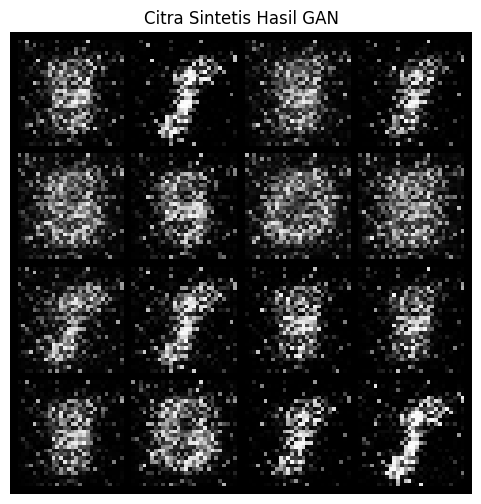

In [7]:
with torch.no_grad():
    z = torch.randn(16, z_dim)
    fake_images = generator(z).view(-1, 1, 28, 28)
    grid = make_grid(fake_images, nrow=4, normalize=True)
    plt.figure(figsize=(6,6))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.title("Citra Sintetis Hasil GAN")
    plt.axis('off')
    plt.show()